# Weather Prediction Using Neural Network(ANN & RNN) by Qiaoying Zhang

### About ANN And RNN
Artificial Neural Networks (ANNs) are a fundamental class of machine learning models inspired by the structure and function of the human brain. ANNs consist of interconnected layers of artificial neurons, including an input layer, one or more hidden layers, and an output layer. Each connection between neurons is associated with a weight, determining the strength of the connection. Neurons use an activation function to process the weighted sum of their inputs and produce an output. ANNs are proficient at learning complex patterns and relationships in data through a process called backpropagation, where the network adjusts its weights to minimize the error between its predictions and the actual target values.

Recurrent Neural Networks (RNNs) are a specialized type of artificial neural network tailored for sequential data and tasks where the order of data points is crucial. Unlike feedforward neural networks, RNNs feature connections that loop back on themselves, enabling the preservation of a hidden state or memory. This memory characteristic allows RNNs to capture temporal dependencies and contextual information in sequences of data, making them particularly well-suited for applications like time series analysis, speech recognition, and natural language processing. RNNs process data step by step, considering the current input and incorporating information from the previous hidden state.

### Dataset
The Weather Dataset comprises 12 columns, providing a comprehensive view of weather conditions over a span of 10 years, from 2005 to 2016. These columns include: "Formatted Date," "Summary," "Precip Type," "Temperature (C)," "Apparent Temperature (C)," "Humidity," "Wind Speed (km/h)," "Wind Bearing (degrees)," "Visibility (km)," "Loud Cover," "Pressure (millibars)," and "Daily Summary." For the purposes of this project, only weather data characterized by overcast, clear, or foggy conditions have been utilized. These specific weather types have been chosen due to their substantial representation in the dataset and the clarity of their precipitation type, which aligns with the project's objectives.

### Purpose of Project
The primary objective of this project is to delve into the intricacies of neural networks, specifically Artificial Neural Networks (ANNs) and Recurrent Neural Networks (RNNs), while also drawing comparisons between them. The choice of utilizing weather prediction data was deliberate, as it provides an opportunity to explore the relationships between various weather parameters such as precipitation, temperature, humidity, and more. The incorporation of data mining techniques in conjunction with neural networks offers valuable insights for weather prediction, a domain where accuracy is of paramount importance, and cost-effectiveness is a critical consideration. By focusing on neural networks, particularly leveraging the backpropagation technique, this project aims to enhance the accuracy and efficiency of daily weather forecasting, potentially offering more cost-effective and reliable results compared to other prediction models.

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split

sns.set_theme(style="dark")

## Data processing

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Checking data type and count of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
# Checking Statistical Summary
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
# Checking Target Variable
print(data["Summary"].value_counts())

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

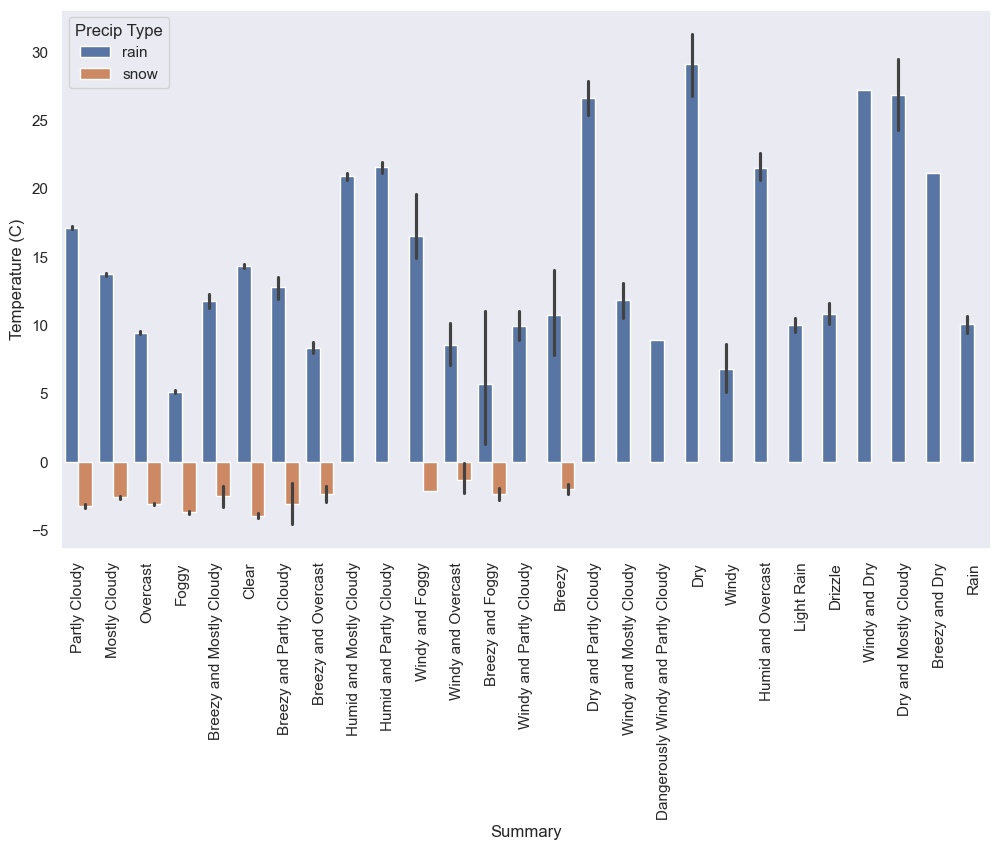

In [6]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=data, x="Summary", y="Temperature (C)",hue="Precip Type")

In [7]:
# Reduced Data because these weathers have significant features
data = data[(data["Summary"] == "Overcast") | (data["Summary"] == "Clear") | (data["Summary"] == "Foggy")]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34635 entries, 46 to 96436
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            34635 non-null  object 
 1   Summary                   34635 non-null  object 
 2   Precip Type               34396 non-null  object 
 3   Temperature (C)           34635 non-null  float64
 4   Apparent Temperature (C)  34635 non-null  float64
 5   Humidity                  34635 non-null  float64
 6   Wind Speed (km/h)         34635 non-null  float64
 7   Wind Bearing (degrees)    34635 non-null  float64
 8   Visibility (km)           34635 non-null  float64
 9   Loud Cover                34635 non-null  float64
 10  Pressure (millibars)      34635 non-null  float64
 11  Daily Summary             34635 non-null  object 
dtypes: float64(8), object(4)
memory usage: 3.4+ MB


## Data cleaning

In [8]:
# Display missing values
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 239
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
# Since no way to classify the percip types, drop the nulls
data.dropna(inplace=True)
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [10]:
# Removing duplicated values
data.drop_duplicates(inplace=True)
print("Duplicated Values: ", data.duplicated().sum())

Duplicated Values:  0


## Data formatting

In [11]:
# Rounding the float64 data upto 2 decimals.
float_cols = data.select_dtypes(include='float')
data[float_cols.columns] = float_cols.round(2)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
46,2006-04-10 22:00:00.000 +0200,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,0.0,1007.85,Mostly cloudy throughout the day.
47,2006-04-10 23:00:00.000 +0200,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,0.0,1007.89,Mostly cloudy throughout the day.
48,2006-04-11 00:00:00.000 +0200,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,0.0,1007.36,Foggy in the evening.
49,2006-04-11 01:00:00.000 +0200,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,0.0,1007.26,Foggy in the evening.
50,2006-04-11 02:00:00.000 +0200,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,0.0,1005.10,Foggy in the evening.


In [12]:
# Formatting Date Column
data['Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Hour'] = data['Date'].dt.hour
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
# Dropping the original column 
data = data.drop(columns=['Formatted Date','Date'], axis=1)
# Removing 'Loud Cover' because it only has '0' attribute
data.drop(columns=["Loud Cover"], axis=1, inplace=True)
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Hour,Year,Month,Day
46,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,Mostly cloudy throughout the day.,20,2006,4,10
47,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,Mostly cloudy throughout the day.,21,2006,4,10
48,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,Foggy in the evening.,22,2006,4,10
49,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,Foggy in the evening.,23,2006,4,10
50,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,Foggy in the evening.,0,2006,4,11


## Outlier removal

In [13]:
# Different types of columns
categorical_cols = list(data.select_dtypes(include=['object']).columns)
continuous_cols = list(data.select_dtypes(include=['float']).columns)
discrete_cols = list(data.select_dtypes(include=['int']).columns)

print("Categorical Columns: ", categorical_cols)
print("Continuous Columns: ", continuous_cols)
print("Discrete Columns: ", discrete_cols)

Categorical Columns:  ['Summary', 'Precip Type', 'Daily Summary']
Continuous Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
Discrete Columns:  ['Hour', 'Year', 'Month', 'Day']


In [14]:
# remove outliers using IQR method
def remove_outliers(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
    return df

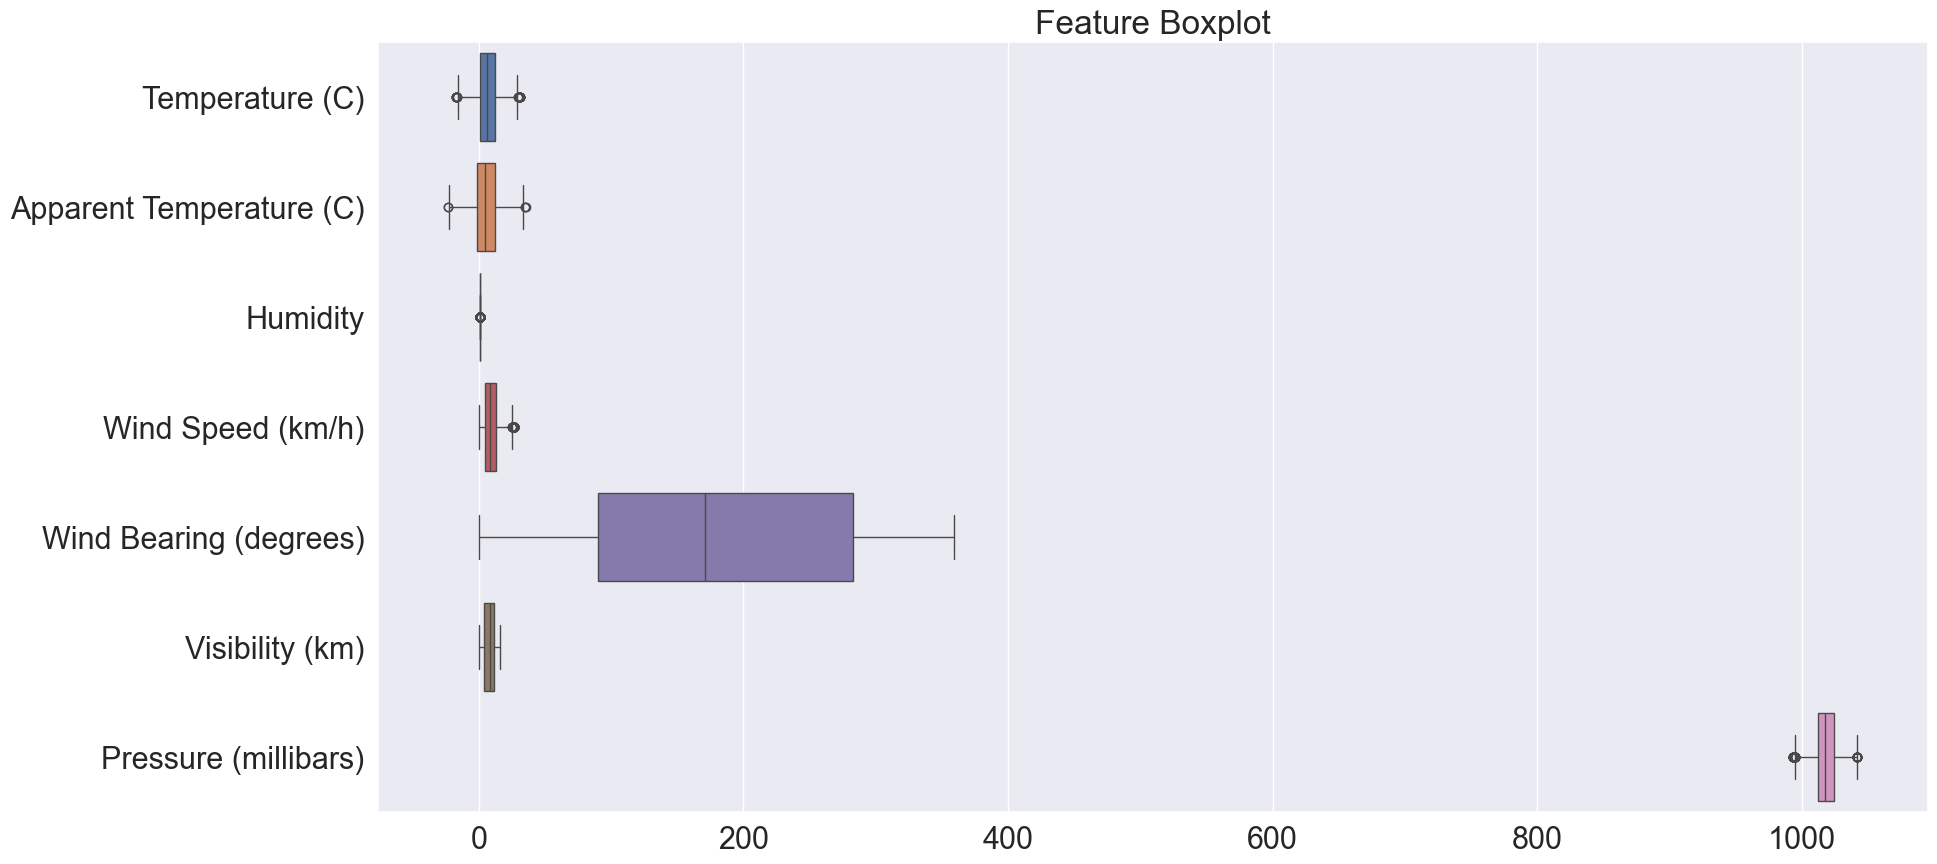

In [15]:
# Plot feature data (without outliers)
for feature in continuous_cols:
    data = remove_outliers(data, feature)
    
plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
sns.boxplot(data=data[continuous_cols], orient="h").set_title('Feature Boxplot')
plt.show()

## Data visualization

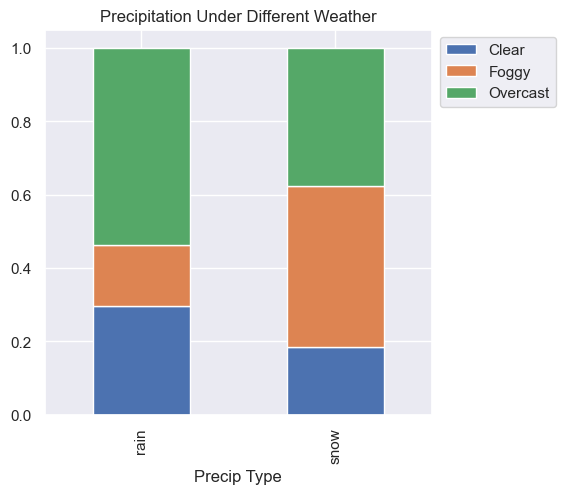

In [16]:
# Visualizing percipitation distribution
tab = pd.crosstab(data['Precip Type'], data['Summary'], normalize="index")

sns.set(font_scale=1)
tab.plot(kind="bar", stacked=True, figsize=(5, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Precipitation Under Different Weather')
plt.show()

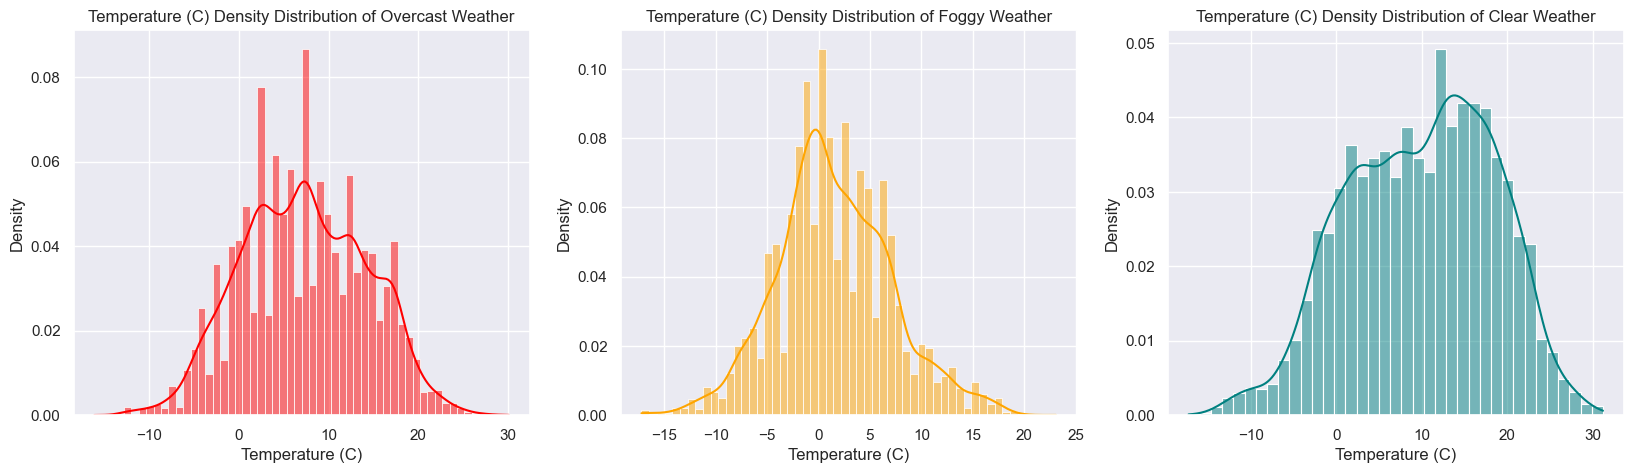

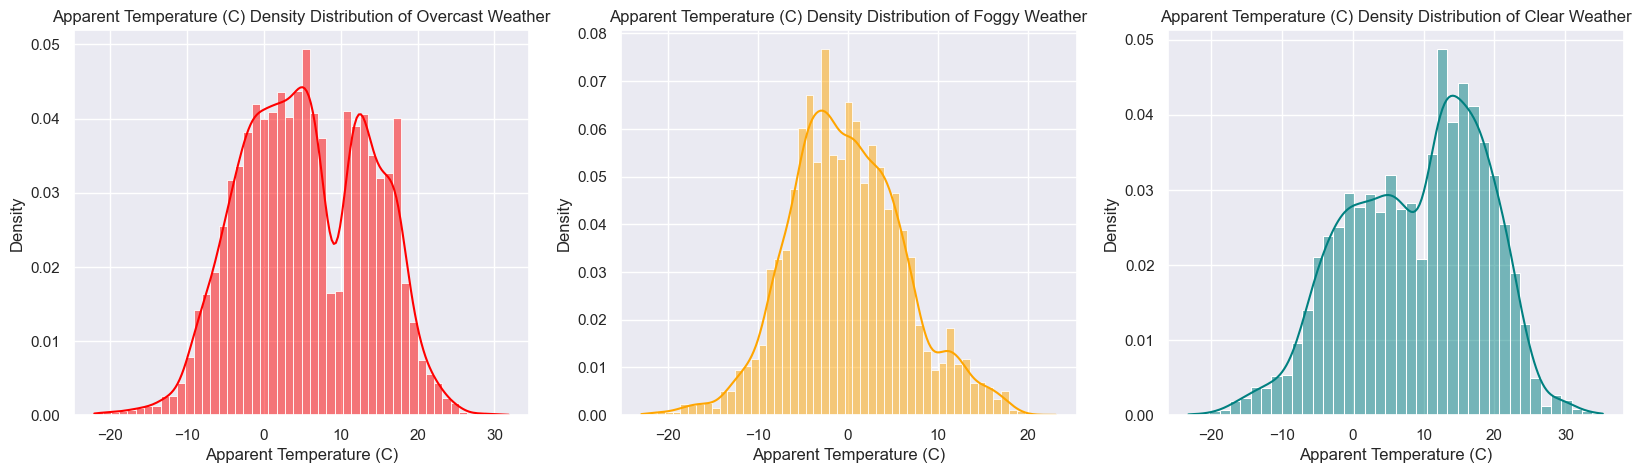

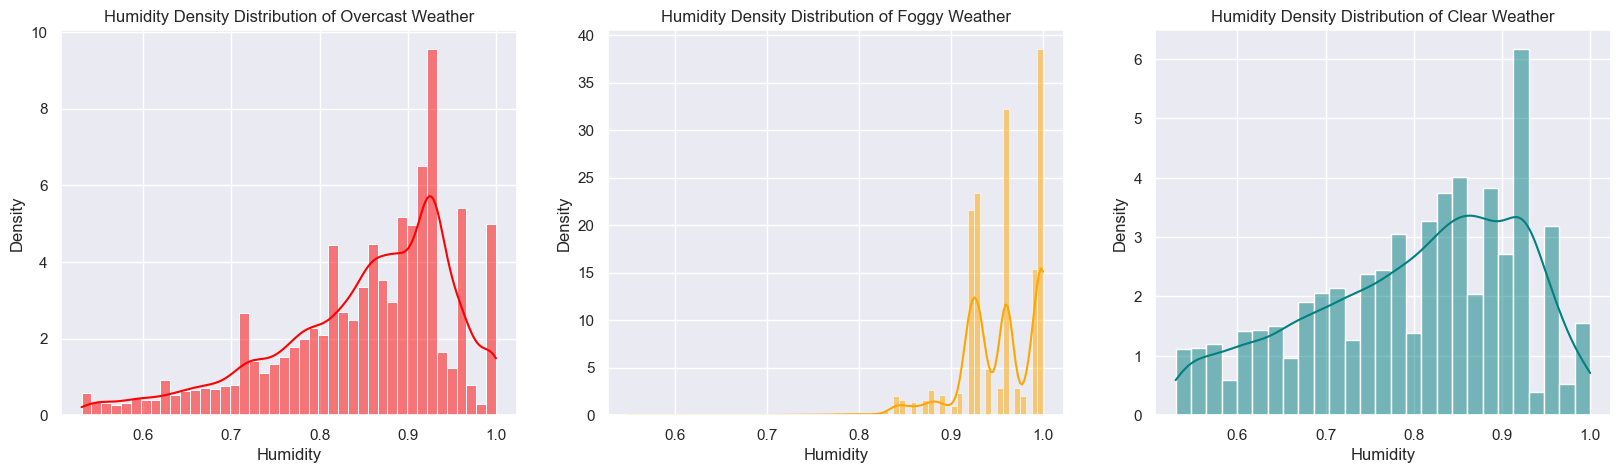

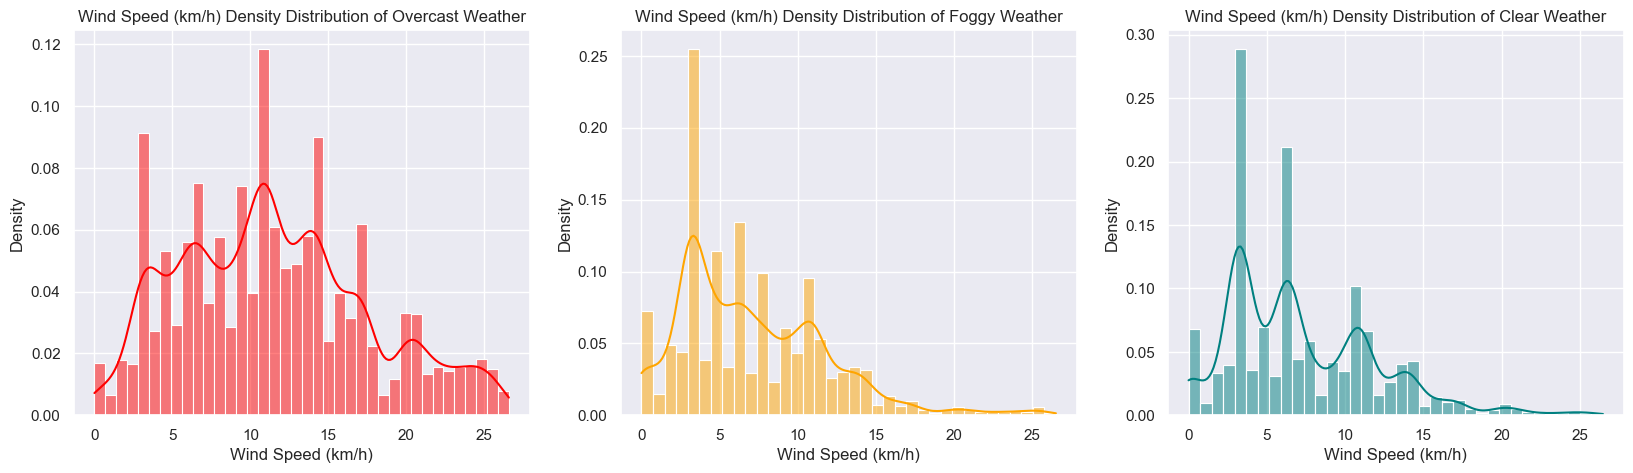

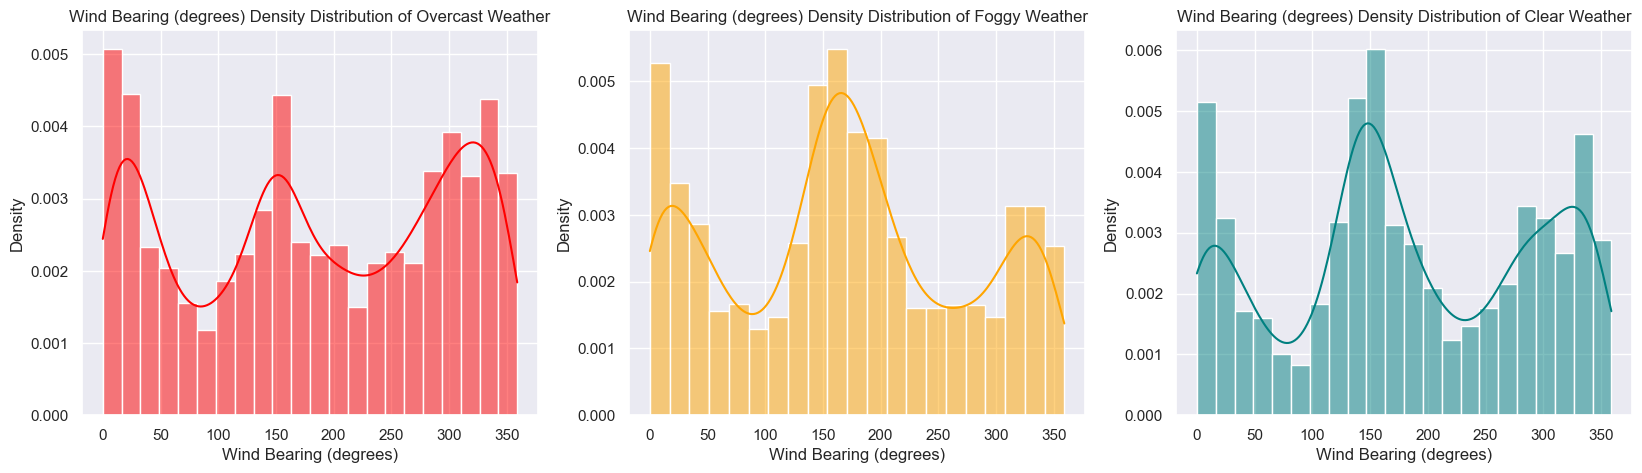

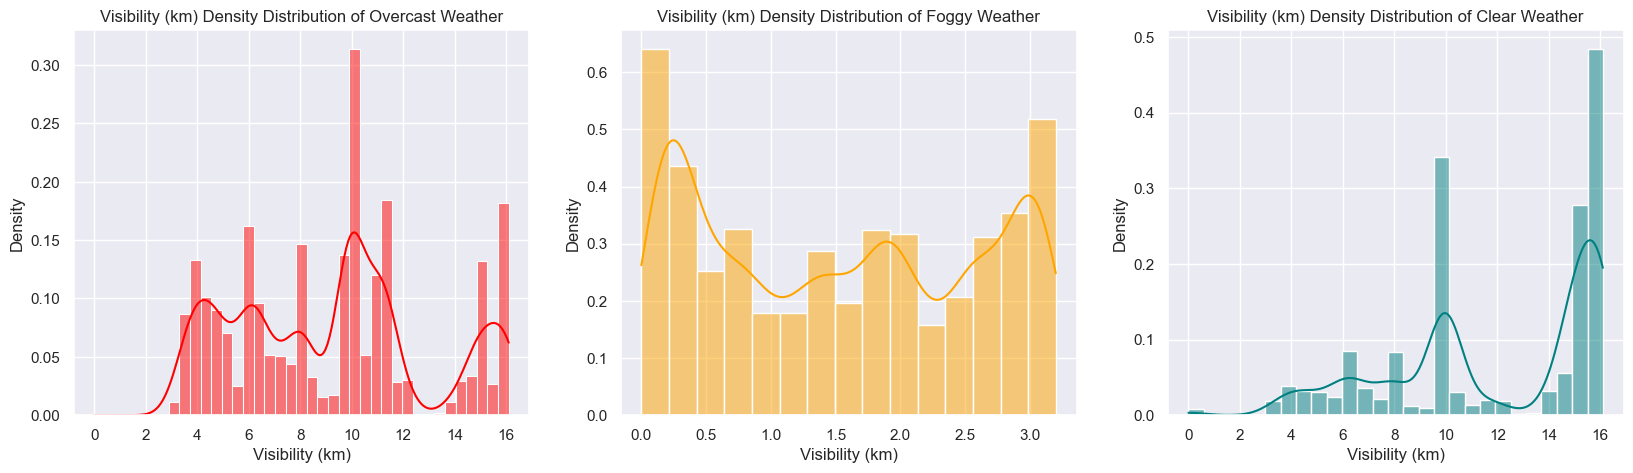

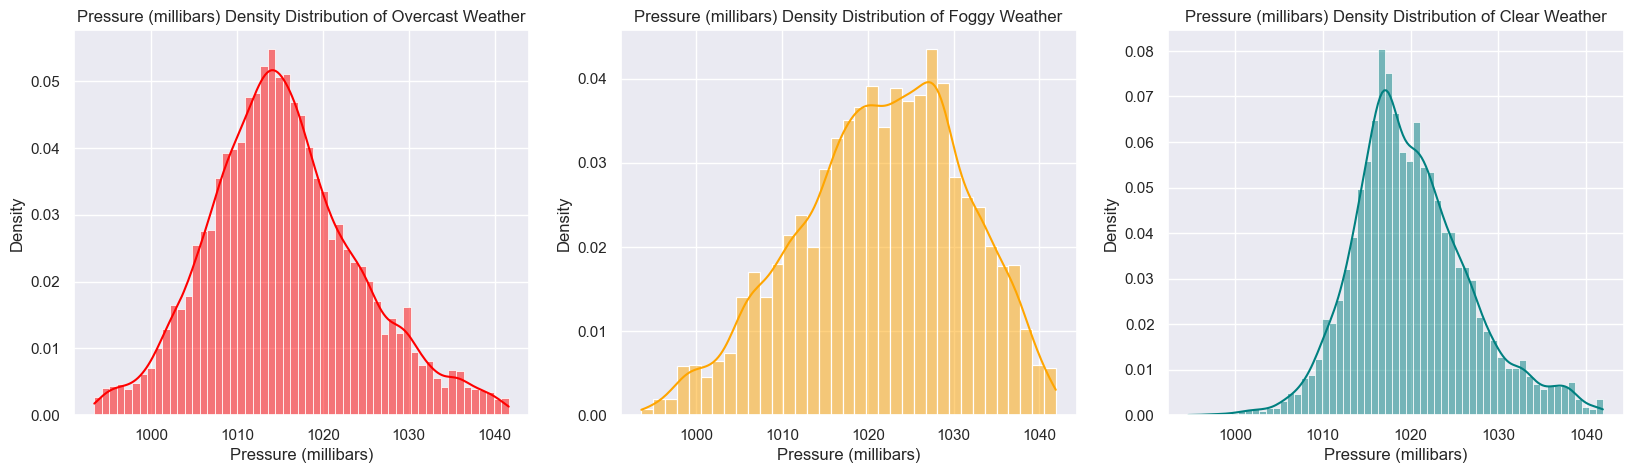

In [17]:
# Plot density distribution of feature for different weathers
color = ['red', 'orange', 'teal']

for feature in continuous_cols:
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    index = 0
    
    for feat in data['Summary'].unique():
        sns.histplot(data=data[data['Summary'] == feat], x=feature, kde=True, ax=axs[index], color=color[index], 
                     stat='density').set_title('{} Density Distribution of {} Weather'.format(str(feature), str(feat)))
        
        index += 1

In [18]:
# Get new statistical dataframe
new_df = data.drop(columns="Summary", axis=1)
# tranform percip type to binary labels
binary = {'rain': 0, 'snow': 1}
new_df['Precip Type'] = new_df['Precip Type'].map(binary)
# drop non-numerical field
new_df.drop(columns=['Daily Summary'], axis=1, inplace=True)
# drop Apparent Temperature because Temperature exists
new_df.drop(columns=['Apparent Temperature (C)'], axis=1, inplace=True)

new_df.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Hour,Year,Month,Day
46,0,14.42,0.58,20.01,159.0,15.83,1007.85,20,2006,4,10
47,0,14.26,0.59,16.50,168.0,14.96,1007.89,21,2006,4,10
48,0,13.77,0.60,17.10,160.0,15.83,1007.36,22,2006,4,10
49,0,13.28,0.63,14.36,160.0,15.83,1007.26,23,2006,4,10
50,0,8.63,0.87,22.04,32.0,6.70,1005.10,0,2006,4,11


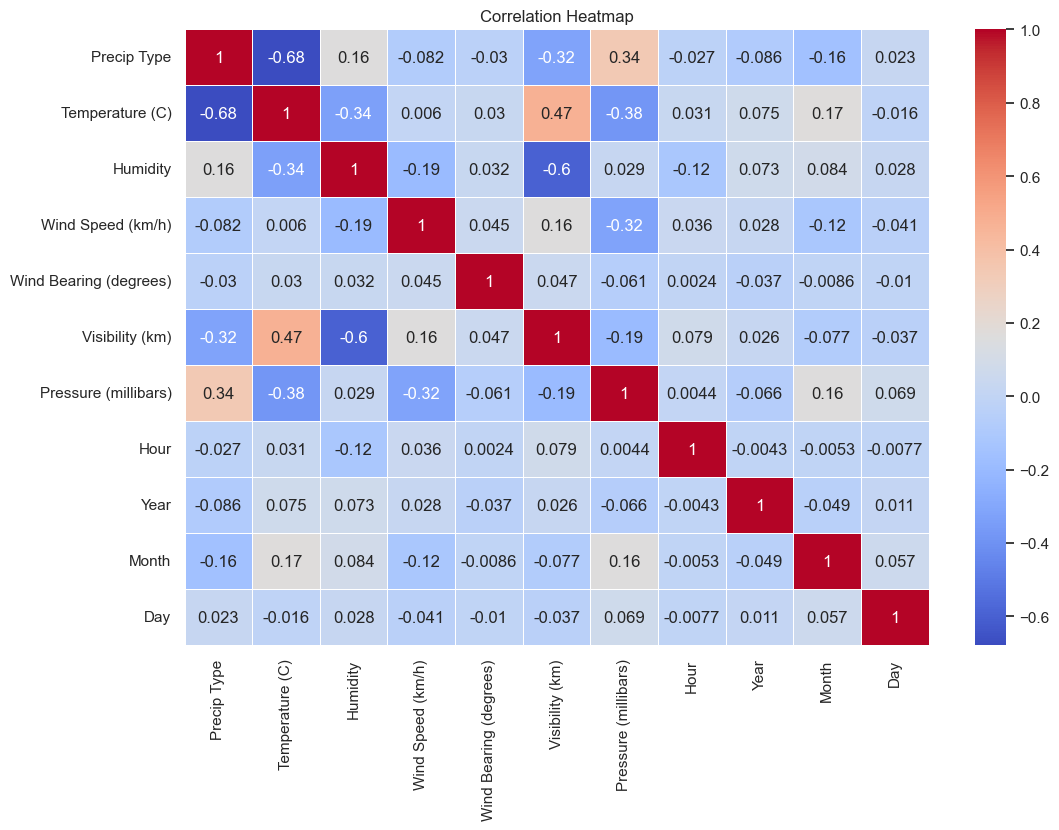

In [19]:
# Check feature correlation using Heatmap
sns.set(style="white")
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Day field appear to have little relationship with all other features, so drop
new_df.drop(['Day'], axis=1, inplace=True)

## Train-Test split

In [21]:
labels = {'Clear': 0, 'Foggy': 1, 'Overcast': 2}
X = new_df.values
y = data['Summary'].map(labels)

X.shape, y.shape

((30558, 10), (30558,))

In [22]:
X

array([[0.000e+00, 1.442e+01, 5.800e-01, ..., 2.000e+01, 2.006e+03,
        4.000e+00],
       [0.000e+00, 1.426e+01, 5.900e-01, ..., 2.100e+01, 2.006e+03,
        4.000e+00],
       [0.000e+00, 1.377e+01, 6.000e-01, ..., 2.200e+01, 2.006e+03,
        4.000e+00],
       ...,
       [0.000e+00, 1.502e+01, 9.000e-01, ..., 3.000e+00, 2.016e+03,
        9.000e+00],
       [0.000e+00, 1.387e+01, 9.300e-01, ..., 4.000e+00, 2.016e+03,
        9.000e+00],
       [0.000e+00, 1.607e+01, 8.800e-01, ..., 5.000e+00, 2.016e+03,
        9.000e+00]])

In [23]:
y.value_counts()

Summary
2    15348
0     8276
1     6934
Name: count, dtype: int64

In [24]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24446, 10), (6112, 10), (24446,), (6112,))

## Train Neural Network model

In [25]:
# Hyperparameters for ANN & RNN
epochs = 150
num_classes = 3
batch_size = 64
learning_rate = 0.001
input_dimension = x_train.shape[1]

In [26]:
# Converting labels to one-hot encoded format
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes)

Epoch 1/150
382/382 [==============================] - 2s 3ms/step - loss: 7.7309 - accuracy: 0.4514 - val_loss: 1.0157 - val_accuracy: 0.5010
Epoch 2/150
382/382 [==============================] - 1s 2ms/step - loss: 1.0286 - accuracy: 0.5001 - val_loss: 1.0271 - val_accuracy: 0.5010
Epoch 3/150
382/382 [==============================] - 1s 2ms/step - loss: 0.9853 - accuracy: 0.5041 - val_loss: 0.9261 - val_accuracy: 0.5187
Epoch 4/150
382/382 [==============================] - 1s 2ms/step - loss: 0.9337 - accuracy: 0.5240 - val_loss: 0.8719 - val_accuracy: 0.5756
Epoch 5/150
382/382 [==============================] - 1s 2ms/step - loss: 0.8845 - accuracy: 0.5486 - val_loss: 0.8462 - val_accuracy: 0.5010
Epoch 6/150
382/382 [==============================] - 1s 2ms/step - loss: 0.8541 - accuracy: 0.5624 - val_loss: 0.8201 - val_accuracy: 0.5748
Epoch 7/150
382/382 [==============================] - 1s 2ms/step - loss: 0.7865 - accuracy: 0.6303 - val_loss: 0.7190 - val_accuracy: 0.6778

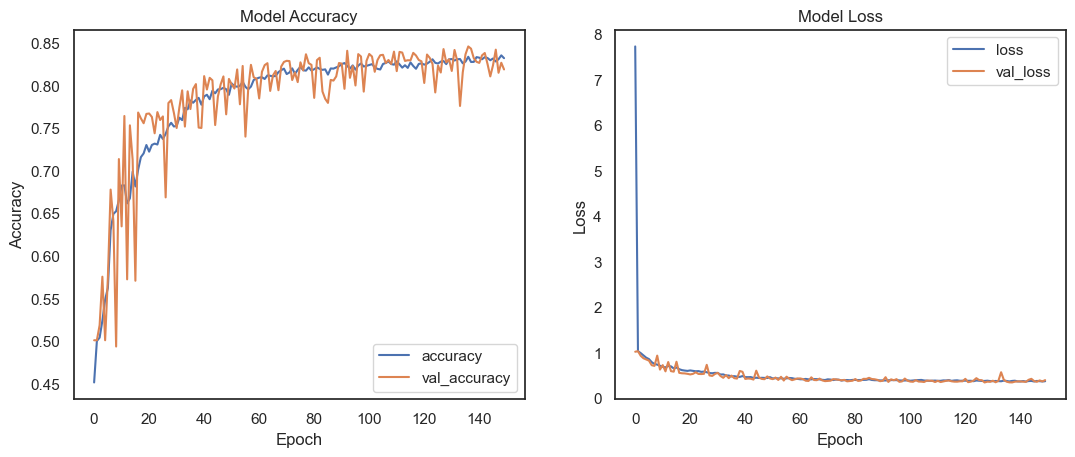

In [27]:
# Architecture 1: 32-64-128-3 Feed Forward Neural Network
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Dense(32, activation='relu', input_dim=input_dimension))
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Model Compilation
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
hist = model1.fit(x_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test_encoded))

# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='loss')          # Train loss (blue)
plt.plot(hist.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.show()

In [28]:
test_loss_1, test_accuracy_1 = model1.evaluate(x_test, y_test_encoded, verbose=0)

print('Test Loss:', test_loss_1)
print('Test Accuracy:', test_accuracy_1)

Test Loss: 0.39101648330688477
Test Accuracy: 0.8188809156417847


Epoch 1/150
382/382 [==============================] - 3s 5ms/step - loss: 3.9519 - accuracy: 0.4606 - val_loss: 1.0304 - val_accuracy: 0.5033
Epoch 2/150
382/382 [==============================] - 1s 3ms/step - loss: 1.0397 - accuracy: 0.4998 - val_loss: 1.0374 - val_accuracy: 0.5010
Epoch 3/150
382/382 [==============================] - 1s 3ms/step - loss: 1.0380 - accuracy: 0.5026 - val_loss: 1.0325 - val_accuracy: 0.5010
Epoch 4/150
382/382 [==============================] - 1s 4ms/step - loss: 1.0356 - accuracy: 0.5022 - val_loss: 1.0280 - val_accuracy: 0.5010
Epoch 5/150
382/382 [==============================] - 1s 4ms/step - loss: 1.0301 - accuracy: 0.5018 - val_loss: 1.0140 - val_accuracy: 0.5010
Epoch 6/150
382/382 [==============================] - 2s 4ms/step - loss: 0.9886 - accuracy: 0.5202 - val_loss: 0.8980 - val_accuracy: 0.5692
Epoch 7/150
382/382 [==============================] - 1s 4ms/step - loss: 0.8723 - accuracy: 0.5712 - val_loss: 0.8792 - val_accuracy: 0.5432

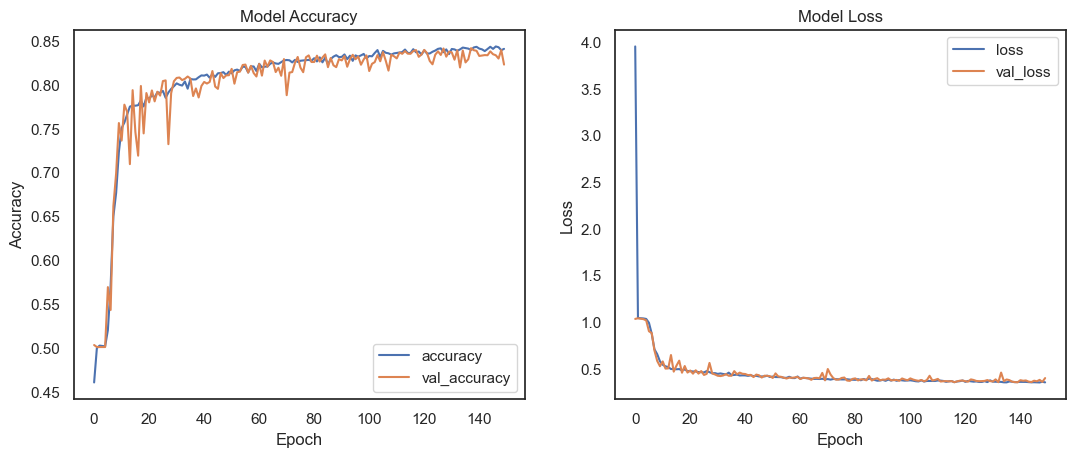

In [29]:
# Architecture 2: 32-64-128-3 Recurrent Forward Neural Network
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.SimpleRNN(32, activation='relu', input_shape=(input_dimension, 1)))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Model Compilation
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
hist = model2.fit(x_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test_encoded))

# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label = 'accuracy')          # Train accuracy (blue)
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')  # Valid accuracy (orange)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='loss')          # Train loss (blue)
plt.plot(hist.history['val_loss'], label='val_loss')  # Valid loss (orange)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.show()

In [30]:
test_loss_2, test_accuracy_2 = model2.evaluate(x_test, y_test_encoded, verbose=0)

print('Test Loss:', test_loss_2)
print('Test Accuracy:', test_accuracy_2)

Test Loss: 0.39614352583885193
Test Accuracy: 0.8226439952850342


## Conclusion
When comparing the performance of two neural network architectures with identical dense layers and hyperparameters, the second model, a Recurrent Forward Neural Network with a layer configuration of 32-64-128-3, exhibits a noteworthy advantage. After 150 epochs of training, this recurrent model demonstrates a slightly higher test accuracy in comparison to the Feed Forward Neural Network counterpart. Furthermore, it's evident that the Recurrent Forward Neural Network converges more rapidly, showcasing its ability to learn and adapt efficiently. Nonetheless, it's worth noting that this expedited convergence comes at the cost of requiring a higher number of training losses to achieve this improved test accuracy, indicating a trade-off between speed and the number of iterations needed for effective learning in this specific architecture.

## Reference
* MUTHUKUMAR.J.(2017). "Weather Dataset," Kaggle, https://www.kaggle.com/datasets/muthuj7/weather-dataset.
* MATEEN, MUJTABA.(2023). "SkyInsight: Weather Classifier," Kaggle, https://www.kaggle.com/code/mujtabamatin/skyinsight-weather-classifier/notebook.